np.array()에는 다양한 원소들로 구성된 리스트를 통해 배열 생성 가능하나 내부 데이터 type은 하나로 통일되어야 한다.  
따라서 문자열로 통일된다.  

In [33]:
import numpy as np
a = [1, 2, 'ab', 'zz']
np.array(a)

array(['1', '2', 'ab', 'zz'], dtype='<U11')

In [34]:
a = [1, 'a', True]
np.array(a)

array(['1', 'a', 'True'], dtype='<U11')

Reshape

In [1]:
import numpy as np

In [3]:
a = np.arange(6)
b = a.reshape(3, 2)
print(b)

[[0 1]
 [2 3]
 [4 5]]


In [4]:
# order, C: c-like, F: fotran like
np.reshape(a, newshape=(1, 6), order = 'C')

array([[0, 1, 2, 3, 4, 5]])

Array Convert  
- np.newaxis, np.expand_dims  

In [7]:
a = np.array([1, 2, 3, 4, 5, 6])
a.shape, a

((6,), array([1, 2, 3, 4, 5, 6]))

In [6]:
a2 = a[np.newaxis,:]
a2.shape, a2

((1, 6), array([[1, 2, 3, 4, 5, 6]]))

1x6의 구조를 가져야 row vector

In [11]:
row_vector = a[np.newaxis, :]
row_vector.shape, row_vector

((1, 6), array([[1, 2, 3, 4, 5, 6]]))

In [10]:
col_vector = a[:, np.newaxis]
col_vector.shape, col_vector

((6, 1),
 array([[1],
        [2],
        [3],
        [4],
        [5],
        [6]]))

In [12]:
b = np.expand_dims(a, axis=1)
b.shape, b

((6, 1),
 array([[1],
        [2],
        [3],
        [4],
        [5],
        [6]]))

In [14]:
c = np.expand_dims(a, axis=0)
c.shape, c

((1, 6), array([[1, 2, 3, 4, 5, 6]]))

Indexing & Slicing

In [16]:
data = np.array([1, 2, 3])
data[-2], data[-2:]

(2, array([2, 3]))

In [11]:
data = np.array([[1, 2], [3, 4], [5, 6]])
data[1:3], data[0:2, 0]

(array([[3, 4],
        [5, 6]]),
 array([1, 3]))

In [23]:
# just value selection
a = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])
six_up = a > 6
divisible_by_2 = (a%2==0)
cond = (a>2)&(a<11)
a[a<6], a[six_up], a[divisible_by_2], a[cond]

(array([1, 2, 3, 4, 5]),
 array([ 7,  8,  9, 10, 11, 12]),
 array([ 2,  4,  6,  8, 10, 12]),
 array([ 3,  4,  5,  6,  7,  8,  9, 10]))

In [24]:
five_up = (a > 5) | (a == 5)
five_up

array([[False, False, False, False],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

np.nonzero()는 () 조건에 부합하는 True 요소의 index를 반환한다.

In [26]:
b = np.nonzero(a<5)
b

(array([0, 0, 0, 0], dtype=int64), array([0, 1, 2, 3], dtype=int64))

In [28]:
# 다음과 같은 index 위치를 생성할 수 있다.
list(zip(b[0], b[1]))

[(0, 0), (0, 1), (0, 2), (0, 3)]

In [31]:
# 해당 조건에 부합하는 원소를 다음과 같이 호출할 수 있으나, 
# a[a<5]로 바로 호출될 수 있으므로, 크게 의미없을 듯.
a[b], a[a<5]

(array([1, 2, 3, 4]), array([1, 2, 3, 4]))

np.vstack(), np.hstack(), np.hsplit(), view(), copy()

In [37]:
a = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
arr1 = a[3:8]
arr1

array([4, 5, 6, 7, 8])

In [12]:
a1 = np.array([[1, 1], [2, 2]])
a2 = np.array([[3, 3], [4, 4]])
a3 = a1.view()
a4 = np.asarray(a2)
a1[0, 0] = 90
a2[0, 0] = 33
a1, a2, a3, a4

(array([[90,  1],
        [ 2,  2]]),
 array([[33,  3],
        [ 4,  4]]),
 array([[90,  1],
        [ 2,  2]]),
 array([[33,  3],
        [ 4,  4]]))

In [41]:
np.vstack((a1, a2)), np.hstack((a1, a2))

(array([[1, 1],
        [2, 2],
        [3, 3],
        [4, 4]]),
 array([[1, 1, 3, 3],
        [2, 2, 4, 4]]))

In [42]:
x = np.arange(1, 25).reshape(2, 12)
x

array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
       [13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]])

split을 하면 array로 이뤄진 리스트가 반환된다. 

In [44]:

np.hsplit(x, 3), type(np.hsplit(x, 3))

([array([[ 1,  2,  3,  4],
         [13, 14, 15, 16]]),
  array([[ 5,  6,  7,  8],
         [17, 18, 19, 20]]),
  array([[ 9, 10, 11, 12],
         [21, 22, 23, 24]])],
 list)

In [6]:
import numpy as np
a = np.array([1, 2, 3])
b = np.array([1, 2, 3])
c = 3
d = 3
e = [1, 2, 3]
id(a), id(b), a is b, id(a[2]), id(b[2]), id(c), id(d), id(e[2]) 

(2400343522352,
 2399830769072,
 False,
 2400342157360,
 2400342157360,
 140710707979112,
 140710707979112,
 140710707979112)

Broadcasting

In [12]:
data = np.array([[1, 2], [3, 4], [5, 6]])
ones_row = np.array([[1, 1]])
data + ones_row

array([[2, 3],
       [4, 5],
       [6, 7]])

Numpy의 dimension에서  
- last axis가 가장 fastest axis이다.  
- first axis가 가장 slowest axis이다. 

In [16]:
a = np.ones((4, 3, 2))
a[1,2,0] = 10
a[1,2,1] = 33
a

array([[[ 1.,  1.],
        [ 1.,  1.],
        [ 1.,  1.]],

       [[ 1.,  1.],
        [ 1.,  1.],
        [10., 33.]],

       [[ 1.,  1.],
        [ 1.,  1.],
        [ 1.,  1.]],

       [[ 1.,  1.],
        [ 1.,  1.],
        [ 1.,  1.]]])

Unique한 값을 찾기  
- 중복없이 값을 찾는다. 

In [19]:
a = np.array([11, 11, 12, 13, 14, 14, 15, 16, 17, 12])
unique_values = np.unique(a)
unique_values

array([11, 12, 13, 14, 15, 16, 17])

In [20]:
unique_values, indices_list = np.unique(a, return_index = True)
print(indices_list)

[0 2 3 4 6 7 8]


In [21]:
unique_values, occurence_count = np.unique(a, return_counts = True)
print(occurence_count)

[2 2 1 2 1 1 1]


중복되지 않는 행을 찾을 때,  axis = 0, 열을 찾을 때, axis = 1

In [26]:
a_2d = np.array([[1, 2, 3, 4],[5, 6, 7, 8], [9, 10, 11, 12], [1, 2, 3, 4]])
unique_values = np.unique(a_2d)
print(unique_values)

[ 1  2  3  4  5  6  7  8  9 10 11 12]


In [27]:
unique_rows = np.unique(a_2d, axis=0)
print(unique_rows)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


In [29]:
unique_rows, indices, occurence_count = np.unique(a_2d, axis=0, return_counts=True, return_index=True)
print(unique_rows)
print(indices)
print(occurence_count)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
[0 1 2]
[2 1 1]


In [31]:
data, data.reshape(2, 3), data.reshape(3, 2)

(array([[1, 2],
        [3, 4],
        [5, 6]]),
 array([[1, 2, 3],
        [4, 5, 6]]),
 array([[1, 2],
        [3, 4],
        [5, 6]]))

Transpose()

In [33]:
arr = np.arange(6).reshape(2, 3)
arr, arr.transpose(), arr.T

(array([[0, 1, 2],
        [3, 4, 5]]),
 array([[0, 3],
        [1, 4],
        [2, 5]]),
 array([[0, 3],
        [1, 4],
        [2, 5]]))

Reverse()

In [35]:
arr = np.array([1, 2, 3, 4, 5, 6, 7, 8])
reversed_arr = np.flip(arr)
reversed_arr

array([8, 7, 6, 5, 4, 3, 2, 1])

In [36]:
arr_2d = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])
reversed_arr = np.flip(arr_2d)
reversed_arr

array([[12, 11, 10,  9],
       [ 8,  7,  6,  5],
       [ 4,  3,  2,  1]])

In [37]:
# reverse only the rows, columns with axis parameter
reversed_arr_rows = np.flip(arr_2d, axis=0)
reversed_arr_columns = np.flip(arr_2d, axis=1)
reversed_arr_rows, reversed_arr_columns

(array([[ 9, 10, 11, 12],
        [ 5,  6,  7,  8],
        [ 1,  2,  3,  4]]),
 array([[ 4,  3,  2,  1],
        [ 8,  7,  6,  5],
        [12, 11, 10,  9]]))

In [39]:
# reverse only one column or row
arr_2d[1] = np.flip(arr_2d[1])  # second row
arr_2d

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [40]:
arr_2d[:, 1] = np.flip(arr_2d[:, 1]) # second column
arr_2d

array([[ 1, 10,  3,  4],
       [ 5,  6,  7,  8],
       [ 9,  2, 11, 12]])

Reshaping & Flattening

In [15]:
x = np.array([[1, 2, 3, 4],[5, 6, 7, 8],[9, 10, 11, 12]])
x.flatten()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

flatten은 연동을 끊고, ravel은 연계를 이어간다.

In [17]:
a1 = x.flatten()
a1[0] = 99
print(x)
print(a1)
print(id(x[0, 0]), id(a1[0]))

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
[99  2  3  4  5  6  7  8  9 10 11 12]
2148367031504 2148367031504


In [13]:
a2 = x.ravel()
a2[0] = 98
x, a2

(array([[98,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]]),
 array([98,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]))

Mean Square   
error = (1/n) * np.sum(np.square(predictions - labels))

.npy, .npz is smaller & faster than .csv. 

In [19]:
a = np.array([1, 2, 3, 4])
np.save('save_test',a)

In [21]:
b = np.load('save_test.npy')
b

array([1, 2, 3, 4])

In [28]:
# header: 파일 맨위에 삽입되는 헤더 텍스트를 지정
csv_arr = np.array([1, 2, 3, 4, 5, 6, 7, 8])
np.savetxt('save_txtarr.csv', csv_arr, fmt='%.2f', delimiter=',', header='This is a header to explain what this is')

In [33]:
# skiprows를 통해 header를 제외할 수 있으나, 딱히 설정하지 않아도 자동 배제.
b = np.loadtxt('save_txtarr.csv', skiprows=1)
b

array([1., 2., 3., 4., 5., 6., 7., 8.])

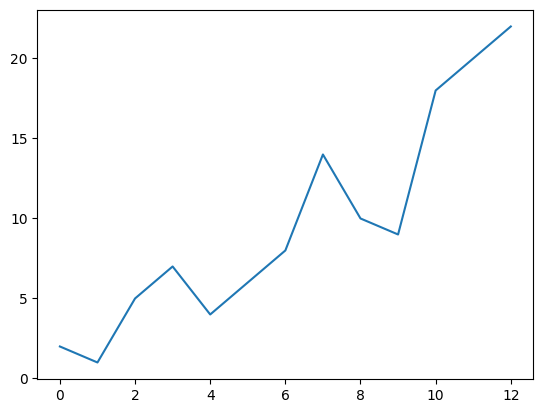

In [34]:
import matplotlib.pyplot as plt
a = np.array([2, 1, 5, 7, 4, 6, 8, 14, 10, 9, 18, 20, 22])
plt.plot(a)